<a href="https://colab.research.google.com/github/rmonro12/Intro_to_ML/blob/main/Homework_Assignments/HW_2/Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ryan Monroe (801219572) - 09/29/2025 <br>
ECGR 4105 - Homework 2, Problem 1

In [ ]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Import .csv dataset from class repository
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
df = pd.read_csv(url)

#Confirm successful import by printing
#print(df.head())

In [ ]:
#Map non-numerical data to numbers
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#Define the values to be mapped
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})
#Replace strings with numerical equivalents
df[varlist] = df[varlist].apply(binary_map)

In [ ]:
#Split data into training and testing sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.80, test_size = 0.20, random_state = 100)

m = df_train.shape[0] # Retrieve the number of training examples

In [ ]:
#Extrapolate data from .csv file
price = df_train.values[:, 0]
area = df_train.values[:, 1].reshape(m,1)
bedrooms = df_train.values[:, 2].reshape(m,1)
bathrooms = df_train.values[:, 3].reshape(m,1)
stories = df_train.values[:, 4].reshape(m,1)
mainroad = df_train.values[:, 5].reshape(m,1)
guestroom = df_train.values[:, 6].reshape(m,1)
basement = df_train.values[:, 7].reshape(m,1)
hotwaterheating = df_train.values[:, 8].reshape(m,1)
airconditioning = df_train.values[:, 9].reshape(m,1)
parking = df_train.values[:, 10].reshape(m,1)
prefarea = df_train.values[:, 11].reshape(m,1)

#print(price[:5]) #confirm correct data has been assigned

In [ ]:
#Create feature matrix with desired input
X0 = np.ones((m, 1)) #Create column vector of all 1's

#Stack each vector to form input matrix
X = np.hstack((X0, area, bedrooms, bathrooms, stories, parking,
               mainroad, guestroom, basement, hotwaterheating,
               airconditioning, prefarea))

print(X[:3])

[[1.0 8050 3 1 1 1 1 1 1 0 1 0]
 [1.0 6360 3 2 4 0 1 0 0 0 1 1]
 [1.0 6750 2 1 1 2 1 1 1 0 0 1]]


In [ ]:
#Set parameters for training
n = X.shape[1] #number of features
theta = np.zeros(n) #initialize vector of theta values
iterations = 15000 #set number of loops
alpha = 0.00000000001 #learning ratio 0.1 - 0.01

#print(theta)

In [ ]:
#Define the cost function discussed in class
def cost_function(X, Y, theta):
  """
  Calculates the cost function for linear regression
  Input:
    X: Input feature matrix including X0
    Y: Epected output variable vector
    theta: The weights/fitting parameters vector
  Output:
    Calculated cost 'J'
  """
  h_x = X.dot(theta) #X dot product theta gives matrix of predicted output
  J = (1/(2*m)) * np.sum(np.square(h_x - Y)) #formula for J (given)

  return J

In [ ]:
#Define gradient descent function discussed in class
def gradient_descent(X, Y, theta, alpha, iterations):
    """
    Calculates the gradient descent to find ideal theta values
    Input:
      X: Input feature matrix
      Y: Expected output vector
      theta: array of weights/fitting parameters
      alpha: learning rate (scalar value)
      iterations: number of loops to run (scalar value)
    Output:
      theta: updated value for each weight/fitting parameter
      cost_history: tracks the cost over time for each iteration
      """
    cost_history = np.zeros(iterations) #initialize vector with zeros

    for i in range(iterations): #loop for each iteration
        h_x = X.dot(theta) #calculate predicted output
        gradient = X.transpose().dot(np.subtract(h_x, Y)) / m #gradient of J
        theta = theta - alpha * gradient #update theta values
        cost_history[i] = cost_function(X, Y, theta)

    return theta, cost_history

Final values of theta = [0.1954310564104808 853.7905074062754 0.6256885461313663
 0.3073723876480905 0.4439125778176946 0.16289669960499384
 0.1745056480246646 0.04873917064711809 0.08448201064859044
 0.0179661312346816 0.09413923742396303 0.060184611953993876]
cost_history = 1691134317950.325


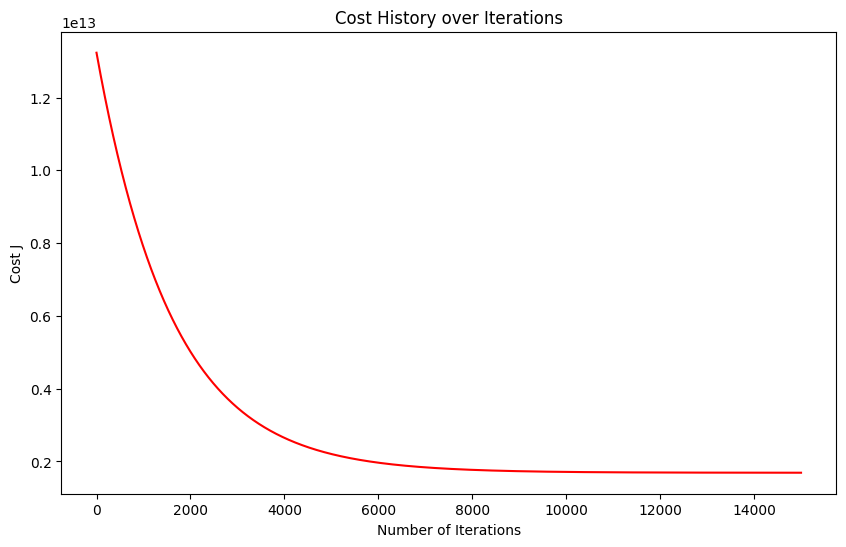

In [ ]:
#Display results
theta, cost_history = gradient_descent(X, price, theta, alpha, iterations)
print('Final values of theta =', theta[:])
print('cost_history =', cost_history[-1])

# Plotting the cost history
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, 'r')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.title('Cost History over Iterations')
plt.show()


In [ ]:
#Test model
m_t = df_test.shape[0] # Retrieve the number of testing examples
area_t = df_test.values[:, 1].reshape(m_t,1)
bedrooms_t = df_test.values[:, 2].reshape(m_t,1)
bathrooms_t = df_test.values[:, 3].reshape(m_t,1)
stories_t = df_test.values[:, 4].reshape(m_t,1)
parking_t = df_test.values[:, 10].reshape(m_t,1)
X0_t = np.ones((m_t, 1))
X_t = np.hstack((X0_t, area_t, bedrooms_t, bathrooms_t, stories_t, parking_t))
Y = X.dot(theta)